In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [17]:
filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

In [18]:
# Find if more people use subway if it rains
# Find if more people use subway if temp is too high or too low
# Find out if there is correlation between rain and temperature from the readings
# Find out if there is any link between hourly and whole day subway entry readings

# we will need to create a correlation funtion to answer these questions

def correlation(x, y):
   
    
    # we pass the argument "ddof=0" to the Pandas std() function to ignore Bessel's correction
    
    std_x = (x - x.mean())/(x.std(ddof=0))
    std_y = (y - y.mean())/ (y.std(ddof=0))
    
    corr = (std_x*std_y).mean()
    return corr

entries = subway_df['ENTRIESn_hourly'] 
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

print 'subway and rains:' , correlation(entries, rain) # no correlation
print 'subway and temperature:' , correlation(entries, temp) # no correlation
print 'rain and temperature:' , correlation(rain, temp)    #  very low negative correlation
print 'hourly and daily entries:', correlation(entries, cum_entries) # moderate positive correlation

subway and rains: 0.0356485157722
subway and temperature: -0.0266933483216
rain and temperature: -0.229034323408
hourly and daily entries: 0.585895470766


In [19]:
# find the station with the maximum riders on the
# first day, then return the mean riders per day for that station. Also
# return the mean ridership overall for comparsion

# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

def mean_riders_for_max_station(ridership):
    
    firstDayMax = ridership.iloc[0,:].argmax()
    overall_mean = ridership.values.mean() 
    mean_for_max = ridership[firstDayMax].mean() 
    
    return (overall_mean, mean_for_max)

mean_riders_for_max_station(ridership_df)

(2342.5999999999999, 3239.9)

In [14]:
# To find ridership per day
# Use groupby() function to group subway data by 'days of the week' (day_week)

ridership_by_day = subway_df.groupby('day_week').mean()['ENTRIESn_hourly']
print  ridership_by_day

day_week
0    1825.264907
1    2164.836433
2    2297.097957
3    2317.072379
4    2277.372294
5    1383.901479
6    1066.436106
Name: ENTRIESn_hourly, dtype: float64


Populating the interactive namespace from numpy and matplotlib


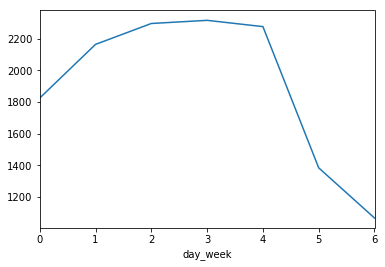

In [15]:
# Observe ridership per day on graph
%pylab inline
import seaborn as sns
ridership_by_day.plot()
#ridership is significantly lower on day 5 and day 6 -> weekends, so it makes sense